
# **Lab Assigment 2**
## **Comparing colors in Abortion and Gender Based Violence protets by femenist movements**.
@ *Victor Saidi Phiri* 
________________________________________________________________________

## **Introduction** 

The last quarter of the 20th century saw the frequent use of colours in women’s movements. The dominant ones were noted to be green, white, and purple. Hence, the essence of this analysis is to observe the colours in the feminist movements in different parts of the world.Specifically, I shall compare the colors used in abortion protests and those related to gender based violence. 







## **Literacture** 

Feminist movements use various visuals during demonstrations, including the uniform colour of clothes, hats, banners, flyers, postcards, and others. For instance, various women’s movements frequently employ the colour pink in their written materials and pink hairstyles when performing demonstrations for abortion rights(Sutton and Vacarezza, 2020). Green was also noted to be commonly used in such protests. The colour purple was noted to be associated with gender-based violence protests.
### *Why the colors*

A survey conducted in 2005 targeting the members of the feminist movements established that women put on the colours for the following reasons:
-	Solidarity and Identity 
-	Connecting with past feminist struggles 
-	Commitment to the movement (Mayhall,2005).
Sawer (2007) argued that political parties and social movements can learn a lot about their followers' needs and wants through the visual tactics they employ. 

**Key questions**

 
1. Is there a difference between the colors used in feminist protests for abortion rights and those used in gender-based violence protests? 

## **Load and Resize Data**

This report worked with 18 pictures obtained from google search. The pictures were on feminists protests focusing on gender based violence and abortion. I used this approach in order to understand the kind of colours used in the two topics to establish a comparison. Since, the images were obtained from varius sources, they varied in sizes. Hence, I used jupyter note book to resise my pictures before opening them in colab for the final analysis. The pictures were resized to; width(1282) and height(797). 
The images were loaded to codlab using google drive. All the images were put into a ZIP folder(GB-AB.zip) which was used in this document. 

In [31]:
# Packages 

import glob
import urllib.request# load zip files 
import cv2
import matplotlib.pyplot as plt # Visualization 
from sklearn.cluster import KMeans
from collections import Counter
from zipfile import ZipFile# Unziping images
import pandas as pd
import numpy as np
from PIL import Image 
import os 

In [32]:
# Load image zip file

url = "https://docs.google.com/uc?export=download&id=1gsB77xMUjkOkok9kRXVzlr_A2x1K8bR5"
fp = "GB-AB.zip"
urllib.request.urlretrieve(url, fp)
#Unzip file 

with ZipFile('GB-AB.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()
   

## **Resize Images**
The data were resized in the jupyuter notebook using the code below. The code allows for resizing multiple pictures.  

In [14]:
import os
from PIL import Image
#from datetime import datetime

#for image_file_name in os.listdir('C:/Users/Saidi/OneDrive/Desktop/v/'):
   # if image_file_name.endswith(".jpg"):
       # now = datetime.now().strftime('%Y%m%d-%H%M%S-%f')

       # im = Image.open('C:/Users/Saidi/OneDrive/Desktop/v/'+image_file_name)
       # new_width  = 1282
       # new_height = 797
       # im = im.resize((new_width, new_height), Image.ANTIALIAS)
        #im.save('C:\\Users\\Saidi\\OneDrive\\Desktop\\test\\resized' + now + '.jpg')

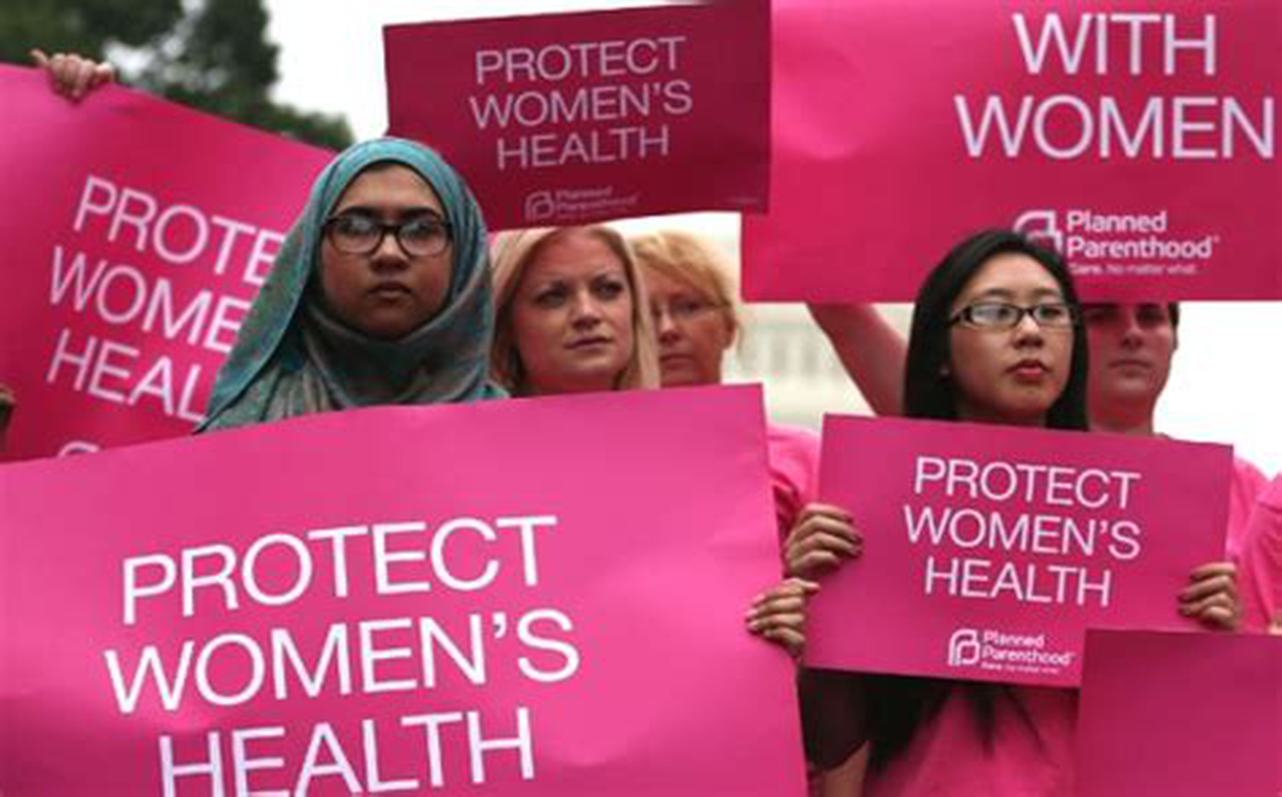

In [33]:
# sample of abortion image 
from google.colab.patches import cv2_imshow
img=cv2.imread('GB-AB/ab-1.jpg')
cv2_imshow(img)

### **Merge Images** 

The images where grouped into two themes, abortion and gender based violence. Each had 9 images.This meant that I remained with two image files. This was possible because the pictures were resized to have the width and height. However, for big datasets it would be better to use a function that could iterate through images.


In [35]:
      # Abortion images 
imgs= [r'GB-AB/ab-1.jpg', r'GB-AB/ab-2.jpg', r'GB-AB/ab-3.jpg', r'GB-AB/ab-4.jpg', r'GB-AB/ab-5.jpg',
       r'GB-AB/ab-6.jpg', r'GB-AB/ab-7.jpg', r'GB-AB/ab-8.jpg', r'GB-AB/ab-9.jpg']
       #GBV Images 
imgs2= [r'GB-AB/gbv-1.jpg', r'GB-AB/gbv-2.jpg', r'GB-AB/gbv-3.jpg', r'GB-AB/gbv-4.jpg', r'GB-AB/gbv-5.jpg',
       r'GB-AB/gbv-6.jpg', r'GB-AB/gbv-7.jpg', r'GB-AB/gbv-8.jpg', r'GB-AB/gbv-9.jpg']


In [36]:
# Abortion

import matplotlib.image as mpimg
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# abortion Images 

total_width = 0
total_height = 0
max_width = 0
max_height = 0
ix =[]
for img in imgs:
    im = Image.open(img)
    size = im.size
    w = size[0]
    h = size[1]
    total_width += w 
    total_height += h
    
    if h > max_height:
        max_height = h
    if w > max_width:
        max_width = w
    ix.append(im) 
print((total_width, total_height, max_width, max_height))

(11538, 7173, 1282, 797)


In [37]:
# merge abortion images vertically

target_vertical = Image.new('RGB', (max_width, total_height)) 
pre_w = 0
pre_h = 0
for img in ix:
    target_vertical.paste(img, (pre_w, pre_h, pre_w+max_width, pre_h + img.size[1]))
    pre_h += img.size[1]
target_vertical.show()
target_vertical.save('vertical.png', quality=100)

In [38]:
# Gender based violence protest images

total_width1 = 0
total_height1 = 0
max_width1 = 0
max_height1 = 0
ix =[]
for i in imgs2:
    im = Image.open(i)
    size = im.size
    w = size[0]
    h = size[1]
    total_width1 += w 
    total_height1 += h
    
    if h > max_height1:
        max_height1 = h
    if w > max_width1:
        max_width1 = w
    ix.append(im) 
print((total_width1, total_height1, max_width1, max_height1))

(11538, 7173, 1282, 797)


In [27]:
# combine images 

target_v = Image.new('RGB', (max_width1, total_height1))
pre_w = 0
pre_h = 0
for img in ix:
    target_v.paste(img, (pre_w, pre_h, pre_w+max_width1, pre_h + img.size[1]))
    pre_h += img.size[1]
target_v.show()
target_v.save('GBV.png', quality=100)

### **Plot Histogram- image** 

- There is more concertration of red in the abortion protest images(picture 1). We can also see that blue is common(abit obstructed by red lin) and black(0)
-  Black seem to common(0) in the gbv pictures. we also a higher level of red but like that of the first graph with abortion protests. 


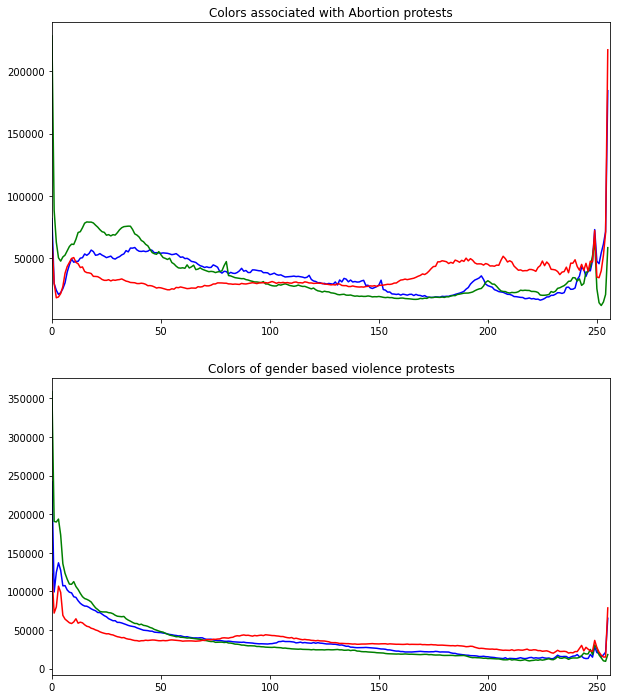

In [28]:
import cv2
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 12))
plt.subplot(2, 1, 1)

# Abortion image 

image = cv2.imread('vertical.png')
for i, col in enumerate(['b', 'g', 'r']):
  hist = cv2.calcHist([image], [i], None, [256], [0, 256])
  plt.plot(hist, color = col)
  plt.xlim([0, 256])
  plt.title('Colors associated with Abortion protests')

  # GVB image

plt.subplot(2, 1, 2)
image = cv2.imread('GBV.png')
for i, col in enumerate(['b', 'g', 'r']):
  hist = cv2.calcHist([image], [i], None, [256], [0, 256])
  plt.plot(hist, color = col)
  plt.xlim([0, 256])
  plt.title('Colors of gender based violence protests')


## **Plot Pie chats** 

In [18]:
# Make pie chat 
# Utility function, rgb to hex

def rgb2hex(rgb):
    hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex
print(rgb2hex([255, 0, 0]))

def plot_image_info(path, k=6):
    # load image
    img_bgr = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # resize image to speed up processing time
    resized_img_rgb = cv2.resize(img_rgb, (64, 64), interpolation=cv2.INTER_AREA)

    # reshape the image to be a list of pixels
    img_list = resized_img_rgb.reshape((resized_img_rgb.shape[0] * resized_img_rgb.shape[1], 3))

    # cluster the pixels and assign labels
    clt = KMeans(n_clusters=k)
    labels = clt.fit_predict(img_list)
        
    # count labels to find most popular
    label_counts = Counter(labels)
    total_count = sum(label_counts.values())

    # subset out most popular centroid
    center_colors = list(clt.cluster_centers_)
    ordered_colors = [center_colors[i]/255 for i in label_counts.keys()]
    color_labels = [rgb2hex(ordered_colors[i]*255) for i in label_counts.keys()]
    
    #print(label_counts.values())
    #print(color_labels)
    
    # plots
    plt.figure(figsize=(30, 15))
    plt.subplot(221)
    plt.imshow(img_rgb)
    plt.axis('off')
    
    plt.subplot(222)
    plt.pie(label_counts.values(), labels=color_labels, colors=ordered_colors, startangle=90)
    plt.axis('equal')
    plt.show()


#ff0000


## **Display colors per protest**

I ploted the pie chats to show the colours under each theme. The first one representing abortion while the second one representing gender based violence. The abortion protests seem to use colours such as pink, red while gvb have red and purple as shown in the graphs below.  We can see that the colours that have been highlited in the literature are consitent with our findings. However, I found that green was not found in our colours which dispute the argument about about the movements colours(green). Hence we claim that there are some difference in colours used in used in abortion and those used in GBV protests. 


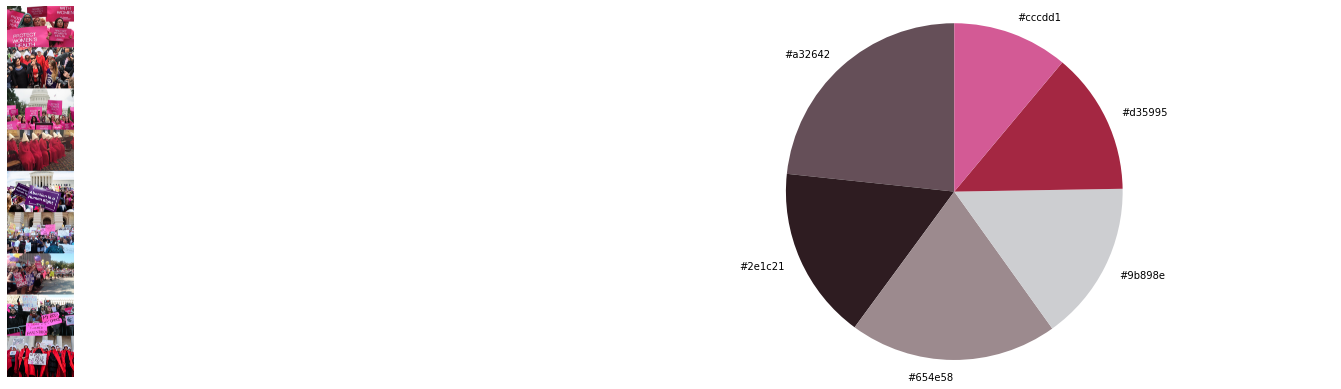

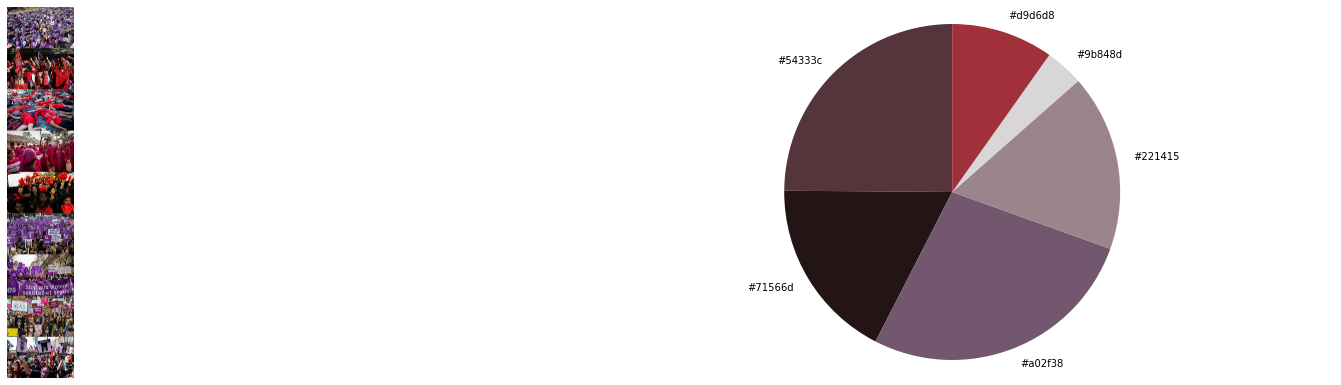

In [39]:
 
plot_image_info('vertical.png') # abortion 

plot_image_info('GBV.png')# gender based violence 


________________________________________________________________________
### **Summary**

Alist of abortion colors:
The haxa colors associated to abortion images appears to include the following:

-   #d35994 : - Moderate pink.
-  #9d8b90 : - Dark grayish pink.
-    #cdcfd2: - Grayish blue
- #664f59  : - Very dark grayish pink
- #a32641 : - Dark red.
- #2e1c21 : - Very dark (mostly black) pink

 Haxa colours related to gender based violence 
 - #9b858d color description : Dark grayish pink
 - #221415 color description : Very dark (mostly black) red
 - #d9d6d8 color description : Light grayish pink
 - #55333c color description : Very dark desaturated pink
 - #a02f38 color description : Dark red
 - #72576e color description : Very dark grayish magenta


source:
https://www.colorhexa.com/9d8b90


_______________________________________________________________________
## **References** 
Marian Sawer (2007) Wearing your Politics on your Sleeve: The Role
of Political Colours in Social Movements, Social Movement Studies, 6:1, 39-56, DOI:10.1080/14742830701251294.

Mayhall, K. E. N. (2005) Domesticating Emmeline: representing the suffragette, 1930– 1993, NWSA Journal,
11(2), Available at: http://iupjournals.org/nwsa/nws11-2.html (accessed 27 March 2005).

Sutton, B. and Vacarezza, N.L. (2020) ‘Abortion Rights in Images: Visual Interventions by Activist Organizations in Argentina’, Signs: Journal of Women in Culture and Society, 45(3), pp. 731–757. Available at: https://doi.org/10.1086/706489.

Color Hexa. https://www.colorhexa.com/9d8b90 retrieved on 2023-01-16

Tutoria Example. Combine Images to One Image Horizontally and Vertically Using Python Pillow: A Step Guide – Pillow Tutorial. available at: 
https://www.tutorialexample.com combine-images-to-one-image-horizontally-and-vertically-using-python-pillow-a-step-guide-pillow-tutorial/.Retrived on 2023-01-16



